In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\toshe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Import the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
def CleanText(list_of_words):
    corpus = []
    for i in range(0, len(list_of_words)):
        #Replace characters that are not letters with a space
        review=[char for char in list_of_words[i] if char not in string.punctuation]
        review=''.join(review)
        #Change to all lowercase letters
        review = review.lower()
        review = review.split()
        #Perform stemming
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove('not')
        all_stopwords.remove('isn')
        all_stopwords.remove('doesn')
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        #Rejoin as a string
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [4]:
corpus = CleanText(dataset.iloc[:,0])
corpus[:5]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [5]:
#Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [6]:
#Splitting the dataset into the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#Training with Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

0.73

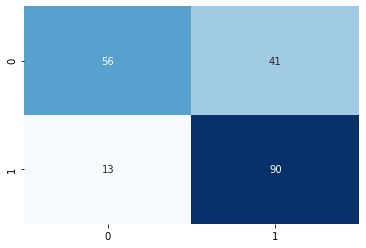

In [8]:
#Making the confusion matrix and determining the accuracy of the model
y_pred = classifier.predict(X_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=cm, fmt='', cbar=False, cmap='Blues')
accuracy_score(y_test, y_pred)

In [9]:
#Making a single prediction
single_review = 'doesn\'t'
cleaned = CleanText([single_review])
print ('Text transformation: %s' % cleaned)
classifier.predict(cv.transform(cleaned).toarray())

Text transformation: ['doesnt']


array([1], dtype=int64)